Most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks.

We will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it:

- Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set.
- Using an iterative optimization approach, Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.

Next we will look at Polynomial Regression, a more complex model that can fit non‐ linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case, using learning curves, and then we will look at several regulari‐ zation techniques that can reduce the risk of overfitting the training set.
Finally, we will look at two more models that are commonly used for classification tasks: Logistic Regression and Softmax Regression.

##### 1. Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).

- Predicted value = bias + weighted_input_feat_1 + weighted_input_feat_2 + ... + weighted_input_feat_n

Training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of θ (weights) that minimizes the RMSE.

##### The normal equation

There is a closed-form solution to find the value of θ that minimizes the cost function, called the Normal Equation.
- θ=(XTX)^−1 XT y


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # 
y = 4 + 3 * X + np.random.randn(100, 1)

Function used to generate the data is y = 4 + 3x1 + Gaussian noise

[0, 2, 0, 15]

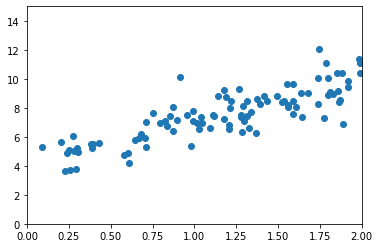

In [9]:
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # inv() function from NumPy’s Linear Algebra module, 
                                                             # (np.linalg) to compute the inverse of a matrix, 
                                                             # and the dot() method for matrix multiplication
theta_best

array([[4.19621013],
       [2.86024227]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close enough, but the noise made it impossible to recover the exact parameters of the original function

In [6]:
# predictions using theta hat:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.19621013],
       [9.91669467]])

[0, 2, 0, 15]

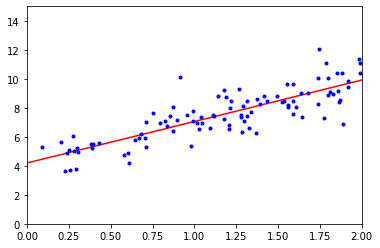

In [7]:
# plot predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

Let's perform linear regression with skclearn


In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.19621013]), array([[2.86024227]]))

In [11]:
lin_reg.predict(X_new)

array([[4.19621013],
       [9.91669467]])

##### Singular value decomposition

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.19621013],
       [2.86024227]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.19621013],
       [2.86024227]])

Computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ VT

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

##### 2. Gradient descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. It measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, we have reached a minimum.

Concretely, we start by filling θ with random values (random initialization), and then we improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult.

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if we pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum.

Training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions.

##### Batch gradient descent

To implement GD, we need to calculate how much the cost function will change if you change θj just a little bit (a partial derivative). Batch GD uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

In [14]:
# an implementation:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta # results

array([[4.19621013],
       [2.86024227]])

##### Stochastic gradient descent

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.

In [16]:
# implementing Stochastic Gradient Descent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_indx = np.random.randint(m)
        xi = X_b[random_indx:random_indx + 1]
        yi = y[random_indx:random_indx + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients 

In [17]:
theta

array([[4.14355353],
       [2.87294155]])

Performing SGD with sklearn

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19639535]), array([2.88920422]))

##### Mini-batch gradient descent

Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

##### 3. Polynomial regression